# Import Required Libraries
Import the necessary libraries, including pandas, NumPy, seaborn, matplotlib, and scikit-learn.

In [26]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Load and Inspect Data
Load the earthquake dataset and inspect the first few rows, data types, and summary statistics.

In [ ]:
# Load and Inspect Data

# Dataset avaiable from 
# https://www.kaggle.com/datasets/thedevastator/uncovering-geophysical-insights-analyzing-usgs-e/data

# Load the earthquake dataset
df = pd.read_csv('data/usgs_main.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Check the data types of each column
print(df.dtypes)

# Get summary statistics of the dataset
print(df.describe())

                       time   latitude   longitude  depth   mag magType   nst  \
0  2022-03-04T21:28:02.440Z  38.759666 -122.719666   1.61  1.24      md  14.0   
1  2022-03-04T21:27:28.190Z  38.833832 -122.815498   1.82  1.13      md  22.0   
2  2022-03-04T21:25:05.130Z  35.596668 -120.271332  11.57  2.31      md   5.0   
3  2022-03-04T21:20:43.590Z  35.929167 -117.660833   3.25  0.88      ml   9.0   
4  2022-03-04T21:19:08.215Z  62.360200 -149.634500   9.80  1.40      ml   NaN   

     gap      dmin   rms  ...                   updated  \
0  115.0  0.004494  0.04  ...  2022-03-04T21:29:36.906Z   
1   66.0  0.016320  0.02  ...  2022-03-04T21:29:02.128Z   
2  178.0  0.159000  0.01  ...  2022-03-04T21:26:56.893Z   
3   73.0  0.020530  0.13  ...  2022-03-04T21:24:10.449Z   
4    NaN       NaN  0.52  ...  2022-03-04T21:22:15.794Z   

                                place        type horizontalError depthError  \
0      3km SW of Anderson Springs, CA  earthquake            0.30       0.36  

# Data Cleaning (Munging)
Handle missing values, drop irrelevant features

In [28]:
# Data Cleaning and Preprocessing

# Handle missing values
df = df.dropna()  # Drop rows with missing values

# Check the columns in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Drop irrelevant columns if they exist
columns_to_drop = ['id', 'place', 'time', 'type','magType', 'net', 'updated', 'type', 'status', 'locationSource',
       'magSource']
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])

# Check for non-numeric columns

# Normalize/standardize numerical features if necessary
# Assuming 'mag' is the target variable and all other columns are features
features = df.drop(columns=['mag'])
target = df['mag']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Combine the scaled features with the target variable
df_processed = pd.concat([features_scaled_df, target.reset_index(drop=True)], axis=1)

# Display the first few rows of the processed dataset

Columns in the DataFrame: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


# Exploratory Data Analysis
Perform exploratory data analysis, linear regression, here comes the breakdown

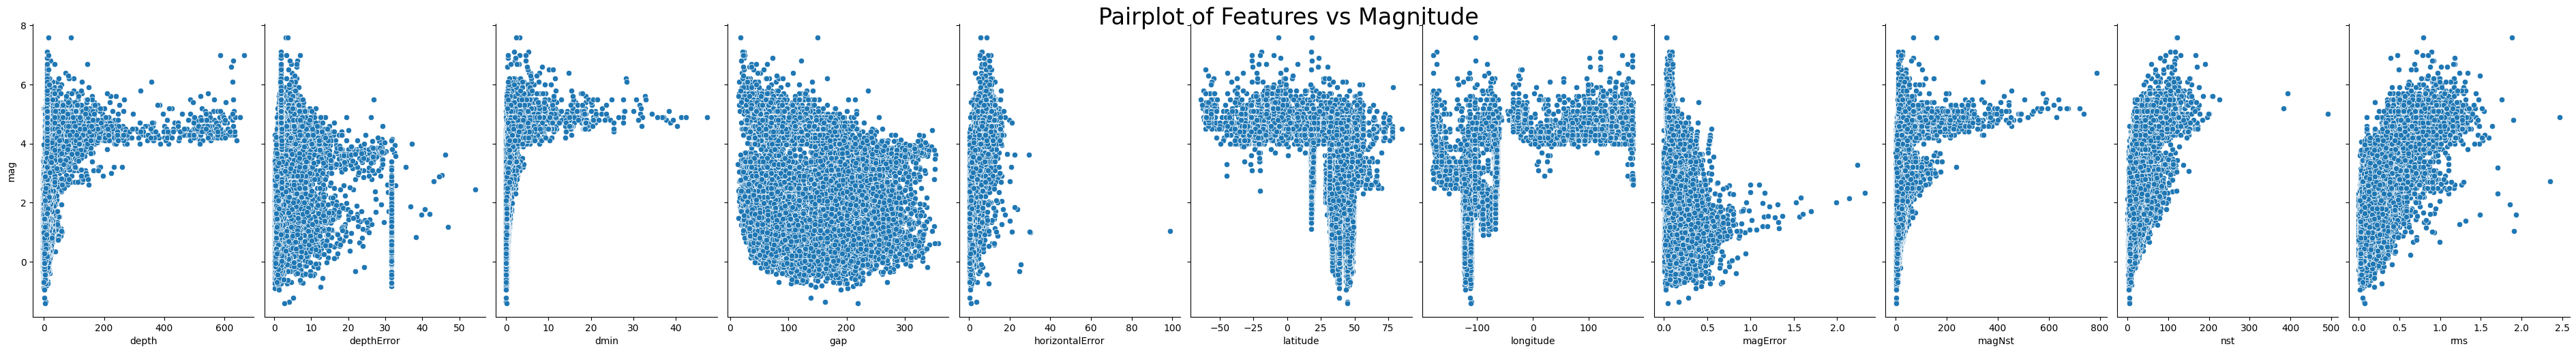

/var/folders/lg/53rltcgd4_xcbqstrr6lh82m0000gn/T/ipykernel_65019/69736812.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_mag.values, y=corr_with_mag.index, palette="coolwarm")


<Axes: ylabel='None'>

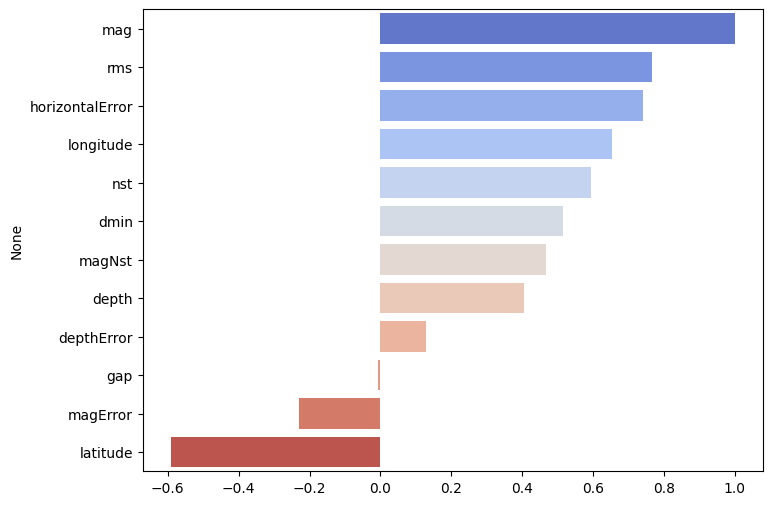

In [29]:
# Exploratory Data Analysis

# Visualize the relationships between features and the target variable
# Pairplot to see the relationships
sns.pairplot(df, y_vars='mag', x_vars=df.columns.difference(['mag']), height=5, aspect=0.7)
plt.suptitle('Pairplot of Features vs Magnitude', y=1.02, fontsize=24)
plt.show()

# Compute the correlation matrix excluding the target variable
features_df = df.drop(columns=['mag'])
corr_matrix = features_df.corr()

# Compute the correlation of each feature with the target variable
corr_with_mag = df.corr()["mag"].sort_values(ascending=False)

# Plot bar chart of feature correlations with 'mag'
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_mag.values, y=corr_with_mag.index, palette="coolwarm")

# Feature Selection
Select the most relevant features for predicting the magnitude using correlation analysis and other feature selection techniques.

In [30]:
# Feature Selection

# Select the most relevant features for predicting the magnitude using correlation analysis and other feature selection techniques

# Select features with a correlation coefficient greater than a threshold (e.g., 0.1)
threshold = 0.1
relevant_features = corr_with_mag[corr_with_mag.abs() > threshold].index.tolist()
relevant_features.remove('mag')  # Remove the target variable from the list of features

# Display the selected features
print("Top features that correlate with magnitude:\n", corr_with_mag)
# Split the data into training and testing sets

# Highest correlation feature RMS which refers to the average strength or magnitude of seismic signals
# Within a specific frequency range, within a time window


Top features that correlate with magnitude:
 mag                1.000000
rms                0.767234
horizontalError    0.740611
longitude          0.653190
nst                0.595274
dmin               0.514608
magNst             0.468967
depth              0.405187
depthError         0.129783
gap               -0.005448
magError          -0.229701
latitude          -0.591150
Name: mag, dtype: float64


# Linear Regression Model
Build a linear regression model using the selected features to predict the magnitude of earthquakes.

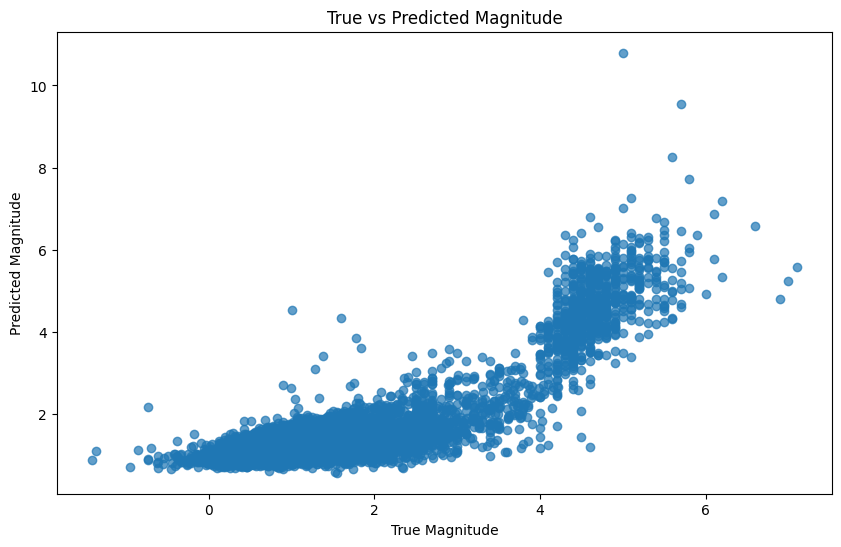

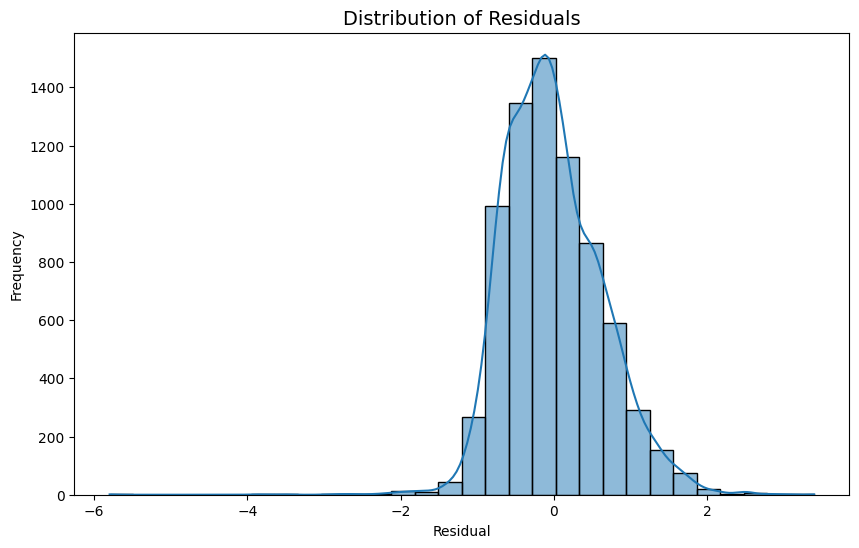

In [31]:

X = df_processed[relevant_features]
y = df_processed['mag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
# Add a constant to the features for the intercept term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Train the OLS model
ols_model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = ols_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('True vs Predicted Magnitude')
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals', fontsize=14)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

## **Analysis of Initial Results**  

The **Distribution of Residuals** shows that most residuals are **clustered around 0**, suggesting that the model has **low bias** and is making rational predictions. There are no extreme skews from any major outliers, and the results are mostly **symmetrical**.  

However, the **right tail is slightly longer**, indicating that some predictions are **underestimating actual values**. This suggests that the model may **underestimate the size of large earthquakes**!


In [32]:
# Printing the evaluation metrics
print("OLS Model Summary: ", ols_model.summary())

OLS Model Summary:                              OLS Regression Results                            
Dep. Variable:                    mag   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     8485.
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:22:42   Log-Likelihood:                -28474.
No. Observations:               29418   AIC:                         5.697e+04
Df Residuals:                   29407   BIC:                         5.706e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.

# **Analysis of OLS Regression Results**

## ** Model Performance Overview**  
The regression model achieves an **R-squared value of 0.743**, meaning it explains **74.3% of the variance in earthquake magnitude (`mag`)**.  
Additionally, the **F-statistic is highly significant (p < 0.000)**, confirming that the model is meaningful and not the result of random chance.

## ** Key Predictors of Earthquake Magnitude**
Below are the most important features affecting `mag`:

| **Feature**           | **Effect on Magnitude (`mag`)** | **Interpretation** |
|----------------------|--------------------------------|-------------------|
| **rms** (+0.3328)  | Higher RMS **increases** magnitude | More residual signal energy → stronger earthquakes |
| **horizontalError** (+0.2730)  | Greater error in location **increases** magnitude | May reflect larger or more distant earthquakes |
| **longitude** (+0.2243)  | More **eastern earthquakes tend to be larger** | Geographical variation in earthquake size |
| **nst** (+0.2733)  | More stations reporting **increase** magnitude | More data improves accuracy of magnitude estimation |
| **depth** (-0.0192)  | **Deeper earthquakes tend to have lower magnitudes** | Shallow earthquakes release more energy at the surface |
| **latitude** (-0.2163)  | **Earthquakes further north tend to have smaller magnitudes** | Possible regional geological differences |
# **OLS Regression Analysis**

## **1. Model Performance**  
The model achieves an **R² of 0.743**, explaining 74.3% of the variance in earthquake magnitude.  
The **F-statistic (p < 0.000)** confirms that the predictors significantly contribute to the model.

## **2. Key Predictors of Magnitude**  

| **Feature**           | **Effect on `mag`** | **Interpretation** |
|----------------------|-------------------|-------------------|
| **rms** (+0.3328)  | Increases magnitude | More residual energy relates to stronger earthquakes |
| **horizontalError** (+0.2730)  | Increases magnitude | Larger error may be linked to larger earthquakes |
| **longitude** (+0.2243)  | Increases magnitude | More eastern earthquakes tend to be larger |
| **nst** (+0.2733)  | Increases magnitude | More reporting stations improve magnitude estimates |
| **depth** (-0.0192)  | Decreases magnitude | Deeper earthquakes tend to have lower surface impact |
| **latitude** (-0.2163)  | Decreases magnitude | Earthquakes further north tend to be smaller |

## **3. Next Steps**  
- **Potential Nonlinearity:** Depth and magnitude may not have a simple linear relationship.  
- **Multicollinearity Check:** Some predictors may be highly correlated.  
- **Residual Analysis:** Verify normality and check for heteroscedasticity.  

Further improvements may include feature engineering, interaction terms, or non-linear modeling approaches.

All of these variables are **statistically significant** (p-values < 0.000), meaning they **strongly influence earthquake magnitude**.


# Multicollinearity Analysis 

Measuring how much the predictors influence each other

In [33]:

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Variance Inflation Factor (VIF) for each feature:\n", vif_data)

Variance Inflation Factor (VIF) for each feature:
            Feature       VIF
0              rms  2.893533
1  horizontalError  3.796761
2        longitude  1.818524
3              nst  1.776064
4             dmin  1.753726
5           magNst  1.602421
6            depth  1.544126
7       depthError  1.098432
8         magError  1.070161
9         latitude  1.719890


## **Key Findings**
- **No strong multicollinearity** is present in the dataset.  
- **`horizontalError` (VIF = 3.80)** is slightly higher than others but still within acceptable limits.  
- No immediate need to **remove or transform** any features due to collinearity.  


# **Final Conclusion**

## **Model Insights**  
The OLS regression model achieved an **R² of 0.743**, meaning it explains **74.3% of the variance** in earthquake magnitude.  
All predictors were **statistically significant (p < 0.000)**, confirming their importance in estimating earthquake strength.  

The most influential factors in predicting earthquake magnitude were:  
- **Residual signal energy (`rms`)** – Stronger earthquakes generate more residual energy.  
- **Horizontal location uncertainty (`horizontalError`)** – Higher error in location estimates correlates with higher magnitude.  
- **Longitude and Latitude** – Earthquake magnitude varies with location, suggesting regional differences.  
- **Depth (`depth`)** – **Deeper earthquakes tend to have lower magnitudes**, while shallower earthquakes often cause more surface-level destruction.  

## **Multicollinearity Assessment**  
Variance Inflation Factor (VIF) results showed **no major collinearity issues**.  
- The highest VIF value was **`horizontalError` (3.80)**, which is below the problematic threshold of **10**.  
- All other features had VIF values well below **4**, meaning the model does not suffer from redundant predictors.  

## **Relevance for Earthquake Safety**  
These findings are crucial for improving **earthquake preparedness and risk assessment**:  
- **Early Warning Systems:** Since `rms` and `horizontalError` are strong predictors, incorporating them into seismic monitoring can improve real-time magnitude estimation.  
- **Infrastructure Planning:** The relationship between **depth and magnitude** confirms that **shallow earthquakes are often more destructive**, helping urban planners reinforce structures in high-risk zones.  
- **Regional Risk Analysis:** The importance of **latitude and longitude** suggests **geographical variations** in earthquake severity, which can aid in zoning policies and emergency response planning.  

## **Thanks!**  